In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import h5py
import glob
from apply_rfchain import open_gp300, open_horizon, smap_2_tf, noise_sample, compute_noise

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
latitude = (90-(-35.206667)) * np.pi / 180
latitude = (90-(50)) * np.pi / 180
latitude = (90-(42.2281)) * np.pi / 180

LST_hours = np.arange(0,24,0.1)
LST_radians = LST_hours * 15 * np.pi / 180
target_freqs = np.fft.rfftfreq(8192, 1/2e9)


In [3]:
path_to_GP300_EW = "/volatile/home/af274537/Documents/WorkingDir/grand/data/detector/Light_GP300Antenna_EWarm_leff.npz"
path_to_GP300_SN = "/volatile/home/af274537/Documents/WorkingDir/grand/data/detector/Light_GP300Antenna_SNarm_leff.npz"
path_to_GP300_Z = "/volatile/home/af274537/Documents/WorkingDir/grand/data/detector/Light_GP300Antenna_Zarm_leff.npz"
t_EW = open_gp300(path_to_GP300_EW)
t_SN = open_gp300(path_to_GP300_SN)
t_Z = open_gp300(path_to_GP300_Z)

In [4]:
balun1      = np.loadtxt("./electronics/balun_in_nut.s2p", comments=['#', '!']).astype(np.float64)
matchnet_sn = np.loadtxt("./electronics/MatchingNetworkX.s2p", comments=['#', '!']).astype(np.float64)
matchnet_ew = np.loadtxt("./electronics/MatchingNetworkY.s2p", comments=['#', '!']).astype(np.float64)
matchnet_z  = np.loadtxt("./electronics/MatchingNetworkZ.s2p", comments=['#', '!']).astype(np.float64)
LNA_sn      = np.loadtxt("./electronics/LNA-X.s2p", comments=['#', '!']).astype(np.float64)
LNA_ew      = np.loadtxt("./electronics/LNA-Y.s2p", comments=['#', '!']).astype(np.float64)
LNA_z       = np.loadtxt("./electronics/LNA-Z.s2p", comments=['#', '!']).astype(np.float64)
cable       = np.loadtxt("./electronics/cable+Connector.s2p", comments=['#', '!']).astype(np.float64)
vga         = np.loadtxt("./electronics/feb+amfitler+biast.s2p", comments=['#', '!']).astype(np.float64)
balun2      = np.loadtxt("./electronics/balun_before_ad.s2p", comments=['#', '!']).astype(np.float64)
zload_map   = np.loadtxt("./electronics/S_balun_AD.s1p", comments=['#', '!']).astype(np.float64)
zant_map    = np.loadtxt("./electronics/Z_ant_3.2m.csv", delimiter=",", comments=['#', '!'], skiprows=1).astype(np.float64)

list_s_maps_sn = [balun1, matchnet_sn, LNA_sn, cable, vga]
list_s_maps_ew = [balun1, matchnet_ew, LNA_ew, cable, vga]
list_s_maps_z = [balun1, matchnet_z, LNA_z, cable, vga]
is_db = [False, False, True, True, True]

tf_sn = smap_2_tf(list_s_maps_sn, zload_map, zant_map, target_freqs, is_db=is_db, balun_2_map=balun2, axis=0)
tf_ew = smap_2_tf(list_s_maps_ew, zload_map, zant_map, target_freqs, is_db=is_db, balun_2_map=balun2, axis=1)
tf_z = smap_2_tf(list_s_maps_z, zload_map, zant_map, target_freqs, is_db=is_db, balun_2_map=balun2, axis=2)
tf = np.stack([tf_sn, tf_ew, tf_z])

In [16]:
tf.shape

(3, 4097)

In [17]:
target_freqs.shape

(4097,)

In [5]:
noise_computer = compute_noise(LST_radians, latitude, 
                              [f"EXPLORATION/LFmap/LFmapshort{i}.npy" for i in range(20, 251)], np.arange(20,251)*1e6,target_freqs, tf,
                              leff_x=t_SN, leff_y=t_EW, leff_z=t_Z)

In [6]:
lon_map, lat_map, temp = np.load(f"EXPLORATION/LFmap/LFmapshort{20}.npy")

In [7]:
from apply_rfchain import latlon2zenaz

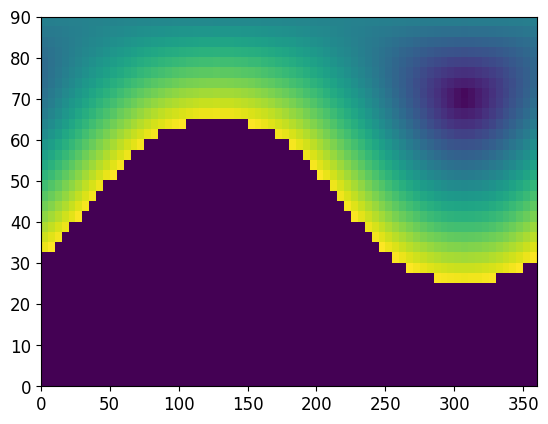

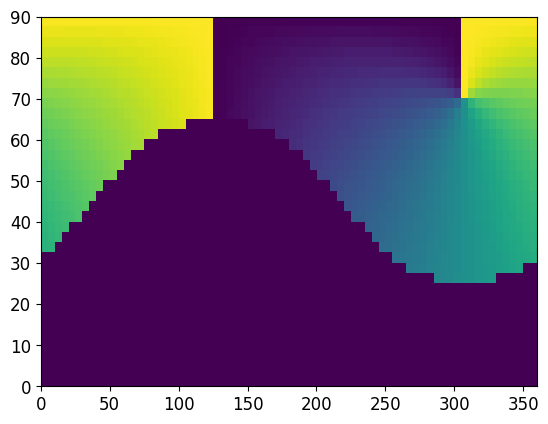

In [8]:
zeni, azi = latlon2zenaz((90-50)*np.pi/180, 20.5*15/180*np.pi, lat_map, lon_map)
plt.imshow(zeni.T*(zeni.T<np.pi/2), extent=(0, 360, 0, 90), aspect='auto')
plt.show()
plt.imshow(azi.T*(zeni.T<np.pi/2), extent=(0, 360, 0, 90), aspect='auto')

Calculating noise power for LST 0.00 hours
Calculating noise power for LST 0.10 hours
Calculating noise power for LST 0.20 hours
Calculating noise power for LST 0.30 hours
Calculating noise power for LST 0.40 hours
Calculating noise power for LST 0.50 hours
Calculating noise power for LST 0.60 hours
Calculating noise power for LST 0.70 hours
Calculating noise power for LST 0.80 hours
Calculating noise power for LST 0.90 hours
Calculating noise power for LST 1.00 hours
Calculating noise power for LST 1.10 hours
Calculating noise power for LST 1.20 hours
Calculating noise power for LST 1.30 hours
Calculating noise power for LST 1.40 hours
Calculating noise power for LST 1.50 hours
Calculating noise power for LST 1.60 hours
Calculating noise power for LST 1.70 hours
Calculating noise power for LST 1.80 hours
Calculating noise power for LST 1.90 hours
Calculating noise power for LST 2.00 hours
Calculating noise power for LST 2.10 hours
Calculating noise power for LST 2.20 hours
Calculating

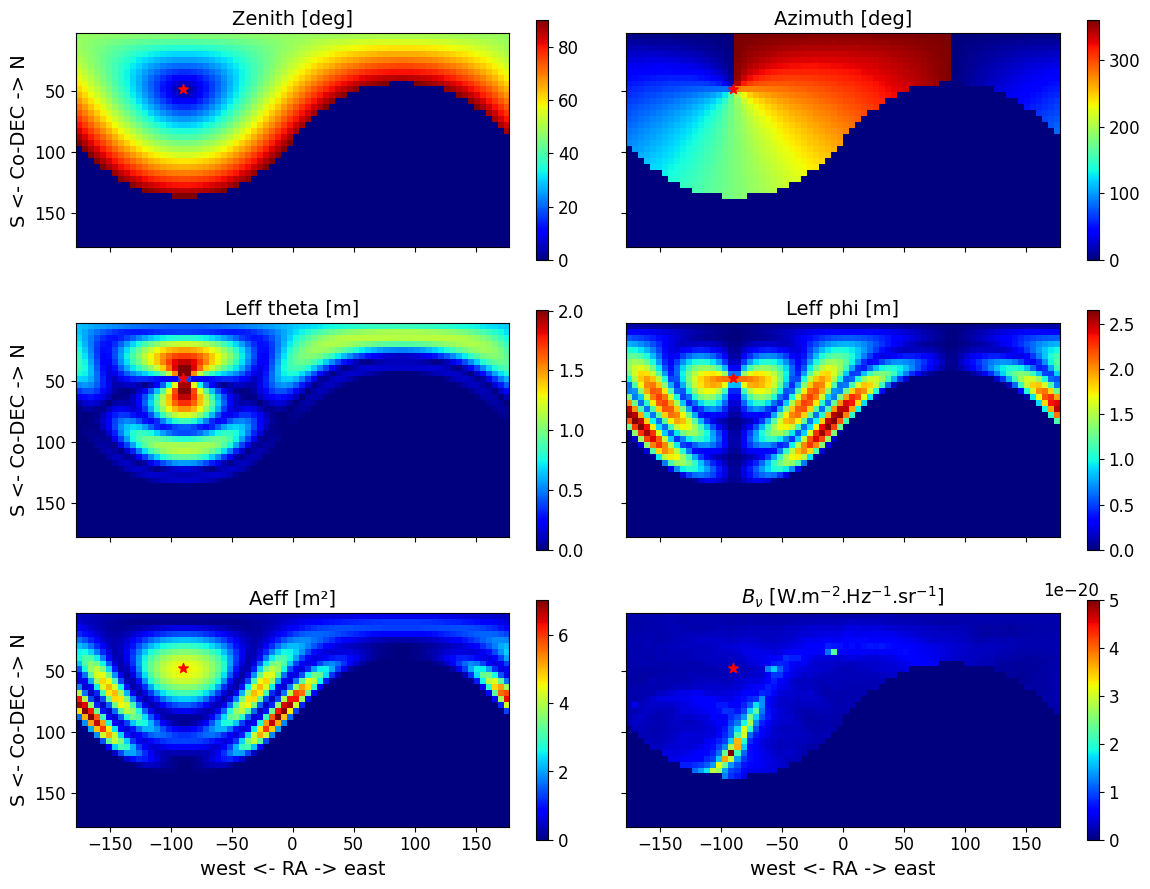

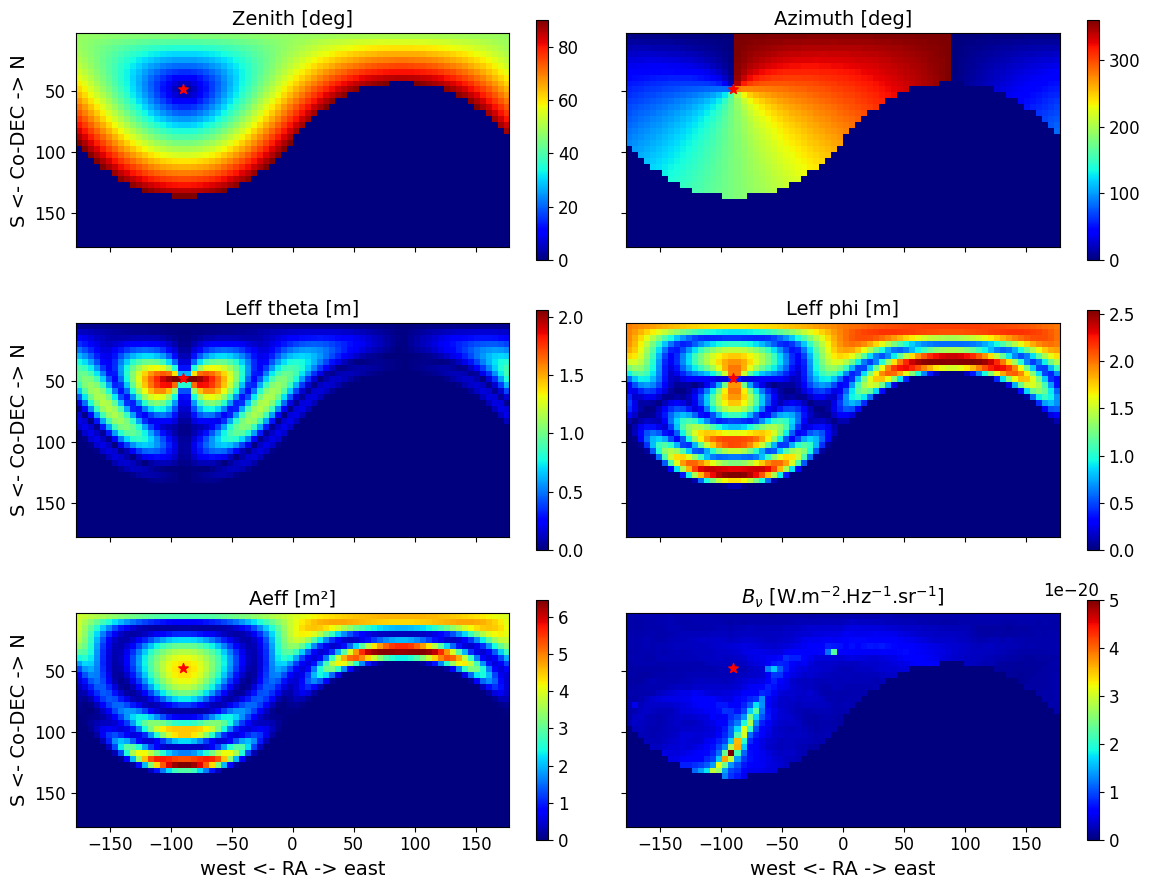

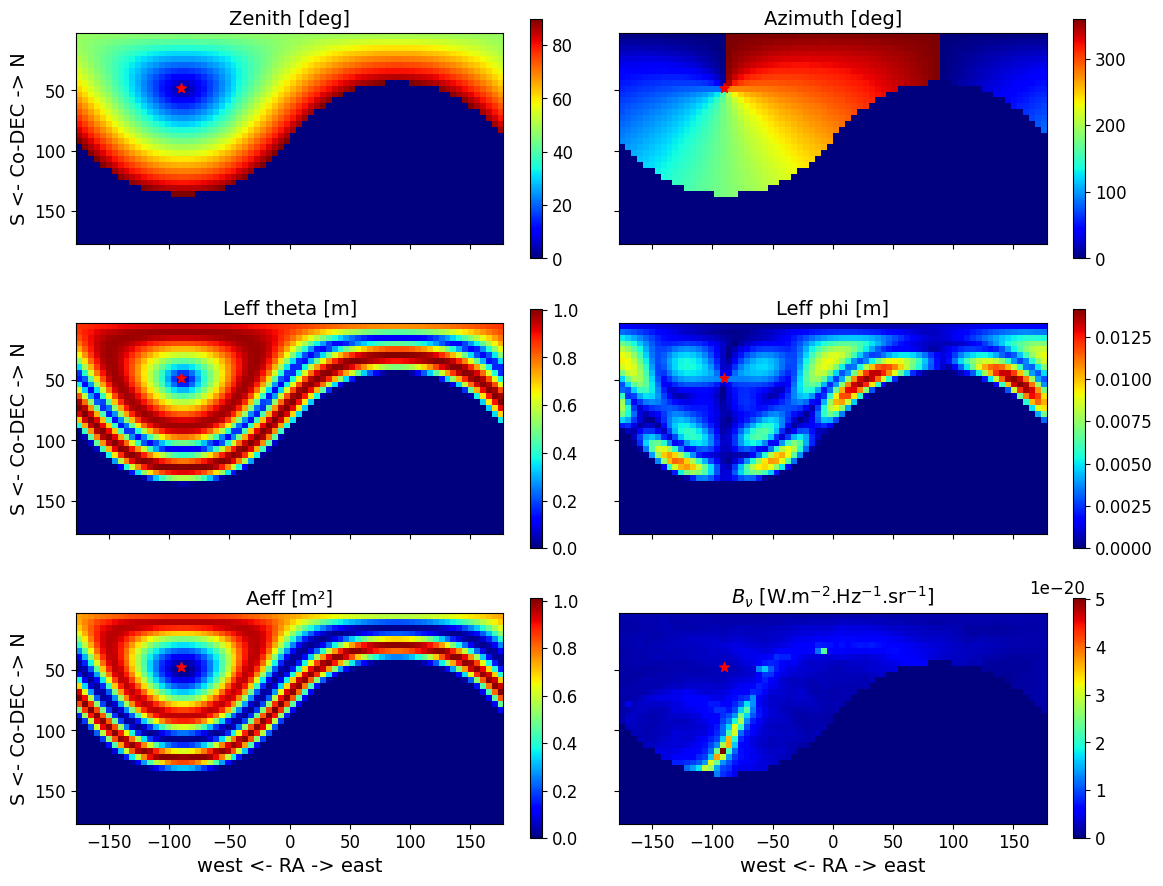

Calculating noise power for LST 6.10 hours
Calculating noise power for LST 6.20 hours
Calculating noise power for LST 6.30 hours
Calculating noise power for LST 6.40 hours
Calculating noise power for LST 6.50 hours
Calculating noise power for LST 6.60 hours
Calculating noise power for LST 6.70 hours
Calculating noise power for LST 6.80 hours
Calculating noise power for LST 6.90 hours
Calculating noise power for LST 7.00 hours
Calculating noise power for LST 7.10 hours
Calculating noise power for LST 7.20 hours
Calculating noise power for LST 7.30 hours
Calculating noise power for LST 7.40 hours
Calculating noise power for LST 7.50 hours
Calculating noise power for LST 7.60 hours
Calculating noise power for LST 7.70 hours
Calculating noise power for LST 7.80 hours
Calculating noise power for LST 7.90 hours
Calculating noise power for LST 8.00 hours
Calculating noise power for LST 8.10 hours
Calculating noise power for LST 8.20 hours
Calculating noise power for LST 8.30 hours
Calculating

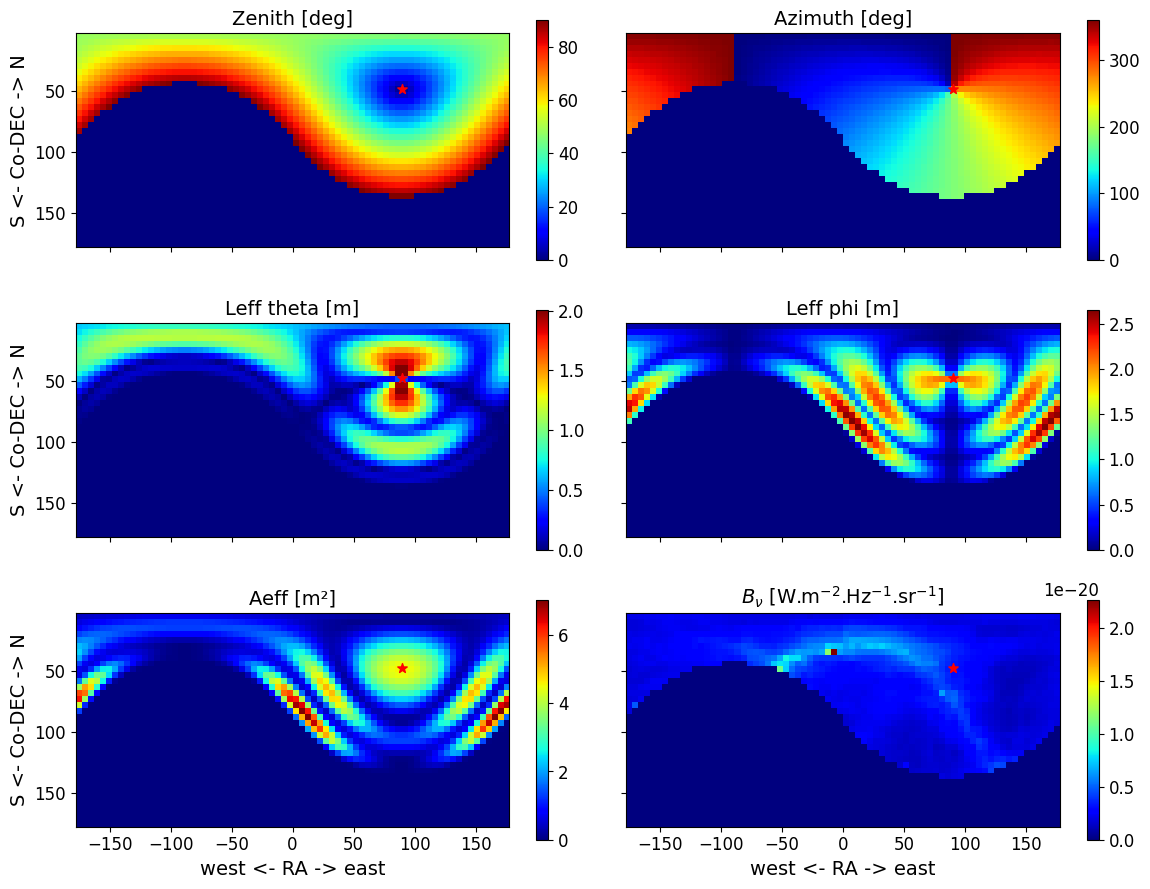

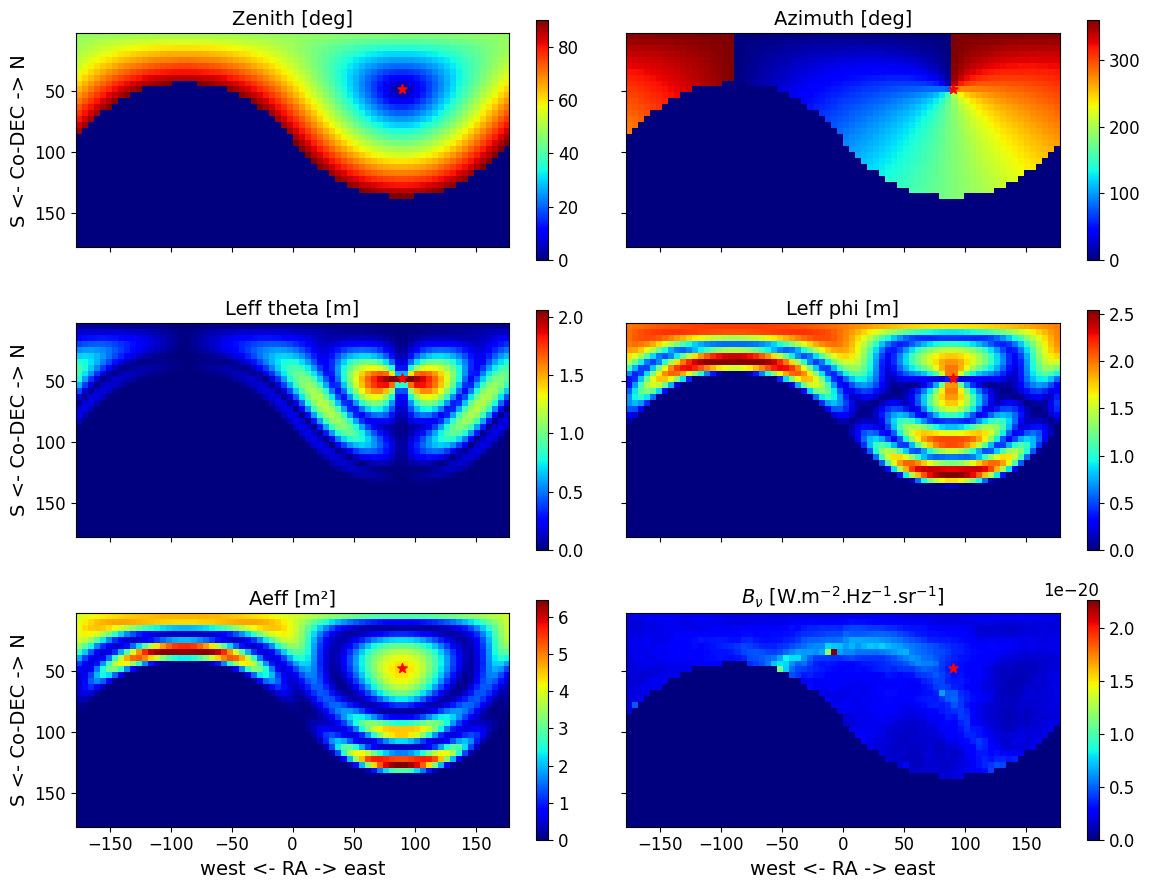

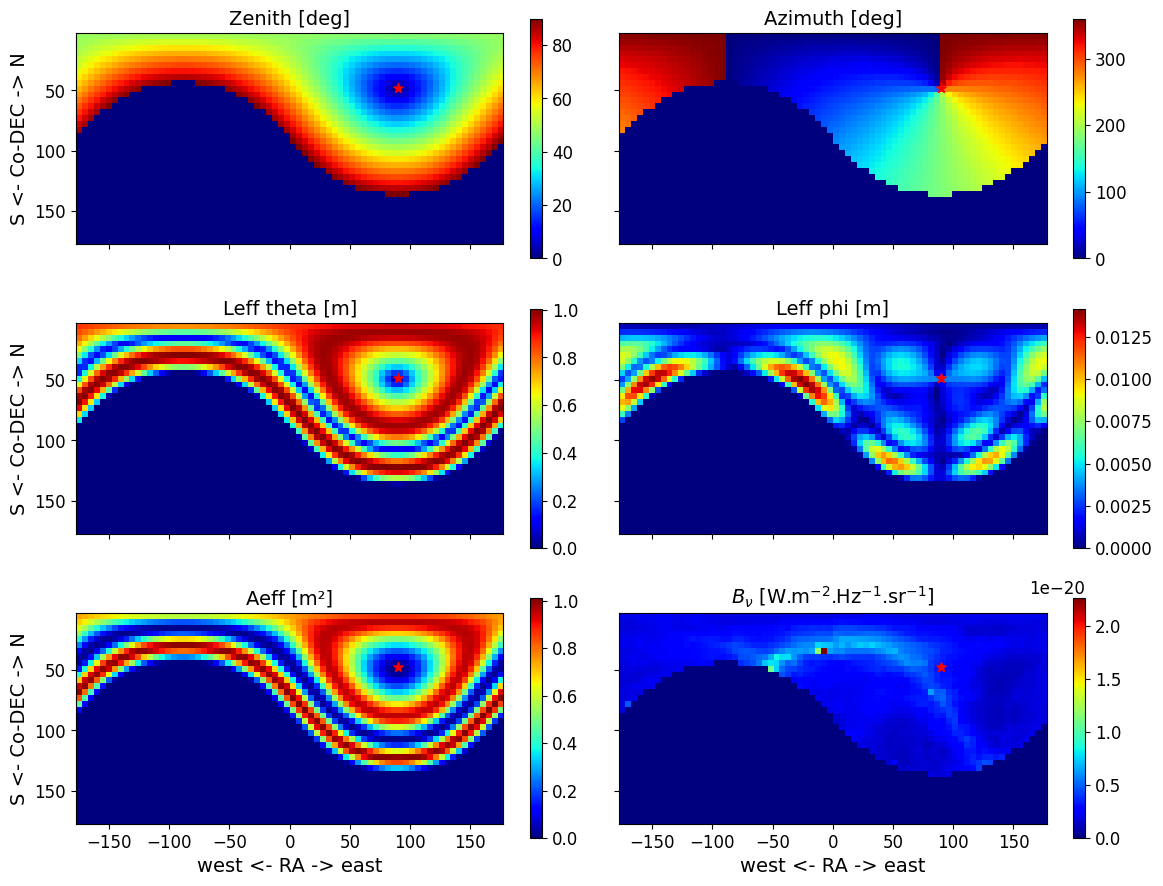

Calculating noise power for LST 18.10 hours
Calculating noise power for LST 18.20 hours
Calculating noise power for LST 18.30 hours
Calculating noise power for LST 18.40 hours
Calculating noise power for LST 18.50 hours
Calculating noise power for LST 18.60 hours
Calculating noise power for LST 18.70 hours
Calculating noise power for LST 18.80 hours
Calculating noise power for LST 18.90 hours
Calculating noise power for LST 19.00 hours
Calculating noise power for LST 19.10 hours
Calculating noise power for LST 19.20 hours
Calculating noise power for LST 19.30 hours
Calculating noise power for LST 19.40 hours
Calculating noise power for LST 19.50 hours
Calculating noise power for LST 19.60 hours
Calculating noise power for LST 19.70 hours
Calculating noise power for LST 19.80 hours
Calculating noise power for LST 19.90 hours
Calculating noise power for LST 20.00 hours
Calculating noise power for LST 20.10 hours
Calculating noise power for LST 20.20 hours
Calculating noise power for LST 

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.65388508e-21, 3.59920214e-21, 3.55879158e-21],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.48825828e-21, 3.42541122e-21, 3.37569759e-21],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.19506860e-21, 4.18327056e-21, 4.16487426e-21]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.68306158e-21, 3.62753401e-21, 3.58634592e-21],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.51781726e-21, 3.45460828e-21, 3.40460973e-21],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.23200495e-21, 4.21991792e-21, 4.20110650e-21]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.73164517e-21, 3.67501825e-21, 3.63276232e-21],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.55008358e-21, 3.48646297e-21, 3.43616481e-21],
        [0.00000000e+00, 0.00000000e

In [9]:
noise_computer.noise_power()

In [10]:
noise_computer.P_nu.shape, tf.shape

((240, 3, 231), (3, 4097))

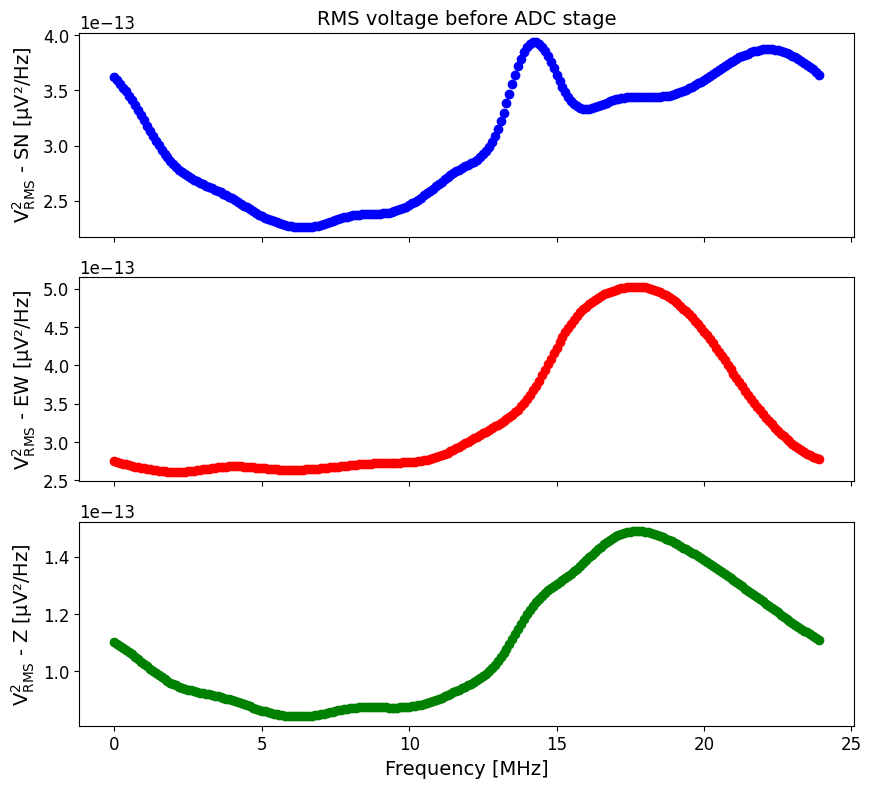

In [11]:
# fig, ax = plt.subplots(3,1, figsize=(10, 9))
# ax.scatter(LST_hours, np.sum(noise_computer.P_nu[:, 0, :] * np.abs(tf[0, :])**2, axis=1), color='blue', label='Vrms voc SN')
# ax.set_xlabel('Frequency [MHz]')
# ax.set_ylabel('V$_{\\rm{RMS}}$ [µV².Hz$^{-1}$]')
# ax.set_title('RMS voltage at ADC stage as a function of frequency')

# fig, ax = plt.subplots(figsize=(10, 3))
# ax.scatter(LST_hours, (np.sum(noise_computer.P_nu[:, 1, :] * np.abs(tf[1, :])**2, axis=1)), color='red', label='Vrms voc SN')
# ax.set_xlabel('Frequency [MHz]')
# ax.set_ylabel('V$_{\\rm{RMS}}$ [µV².Hz$^{-1}$]')


delta_nu = 1e6
fig, ax = plt.subplots(3,1, figsize=(10, 9), sharex=True)
mask = (noise_computer.frequencies>=60e6) & (noise_computer.frequencies<=80e6)

ax[0].set_title('RMS voltage before ADC stage')
ax[0].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 0, mask], axis=1)*delta_nu, color='blue')
# ax[0].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 0, mask], axis=1)*delta_nu/4, color='blue', ls=':')
ax[0].set_ylabel('V$_{\\rm{RMS}}^2$ - SN [µV²/Hz]')
ax[1].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 1, mask], axis=1)*delta_nu, color='red')
# ax[1].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 1, mask], axis=1)*delta_nu/4, color='red', ls=':')
ax[1].set_ylabel('V$_{\\rm{RMS}}^2$ - EW [µV²/Hz]')
ax[2].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 2, mask], axis=1)*delta_nu, color='green')
# ax[2].scatter((noise_computer.lst_rads*180/np.pi/15+12)%24, np.sum(noise_computer.P_nu[:, 2, mask], axis=1)*delta_nu/4, color='green', ls=':')
ax[2].set_ylabel('V$_{\\rm{RMS}}^2$ - Z [µV²/Hz]')
ax[2].set_xlabel('Frequency [MHz]')


# ax[0].ticklabel_format(axis='y', style='sci', scilimits=(5,5))
# ax[1].ticklabel_format(axis='y', style='sci', scilimits=(5,5))
# ax[2].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(10,2))
# plt.tight_layout()

# Noise samples

In [12]:
tf.shape

(3, 4097)

In [13]:
noise_computer = compute_noise(LST_radians[::5], latitude,
                              [f"EXPLORATION/LFmap/LFmapshort{i}.npy" for i in range(20, 251)], np.arange(20,251)*1e6, target_freqs[:], tf[:,:],
                              leff_x=t_SN, leff_y=t_EW, leff_z=t_Z)

Calculating noise power for LST 0.00 hours
Calculating noise power for LST 0.50 hours
Calculating noise power for LST 1.00 hours
Calculating noise power for LST 1.50 hours
Calculating noise power for LST 2.00 hours
Calculating noise power for LST 2.50 hours
Calculating noise power for LST 3.00 hours
Calculating noise power for LST 3.50 hours
Calculating noise power for LST 4.00 hours
Calculating noise power for LST 4.50 hours
Calculating noise power for LST 5.00 hours
Calculating noise power for LST 5.50 hours
Calculating noise power for LST 6.00 hours


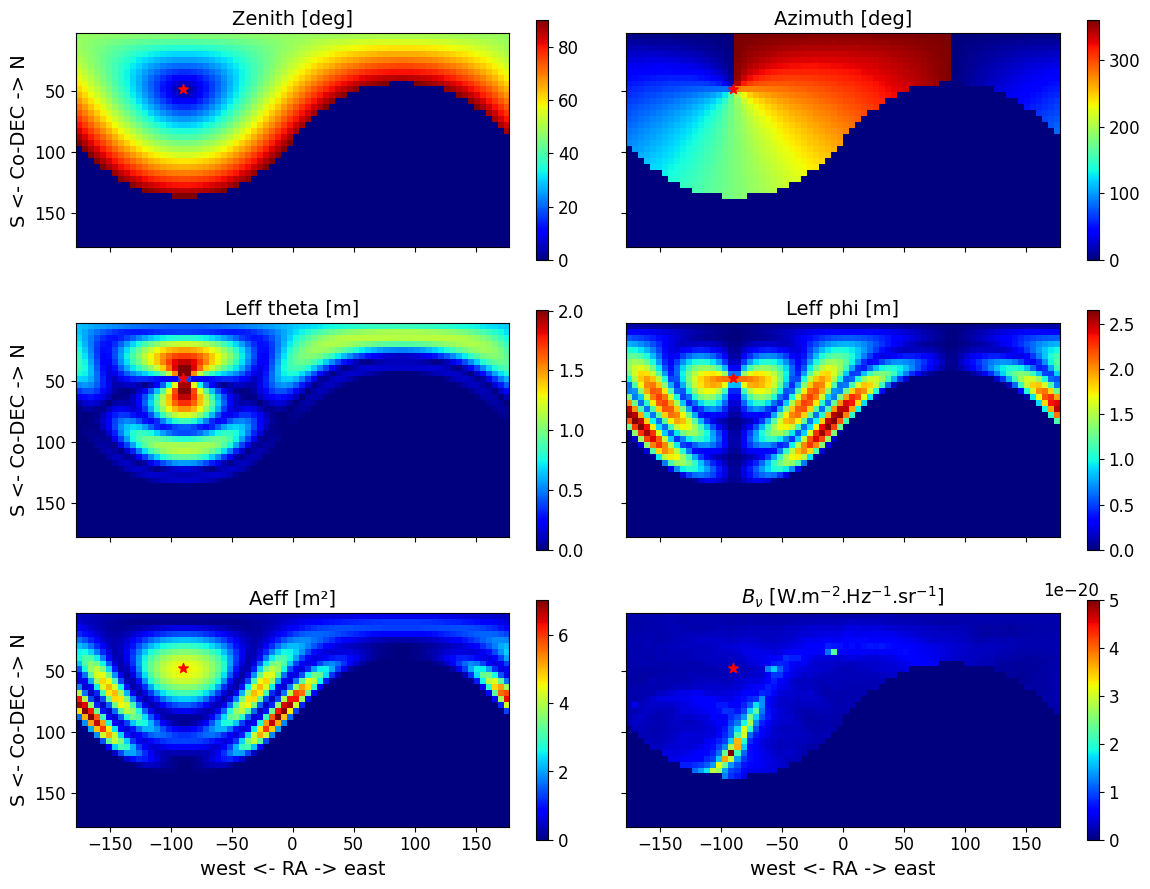

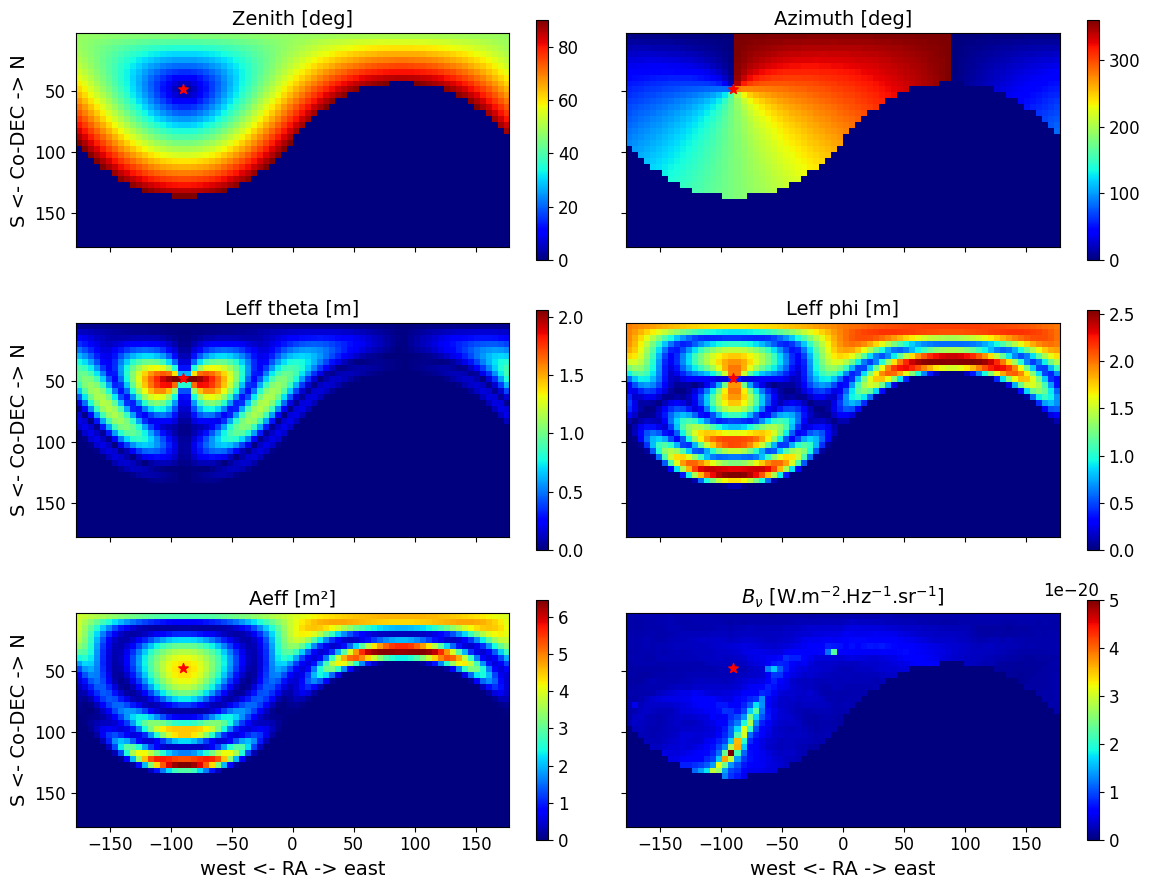

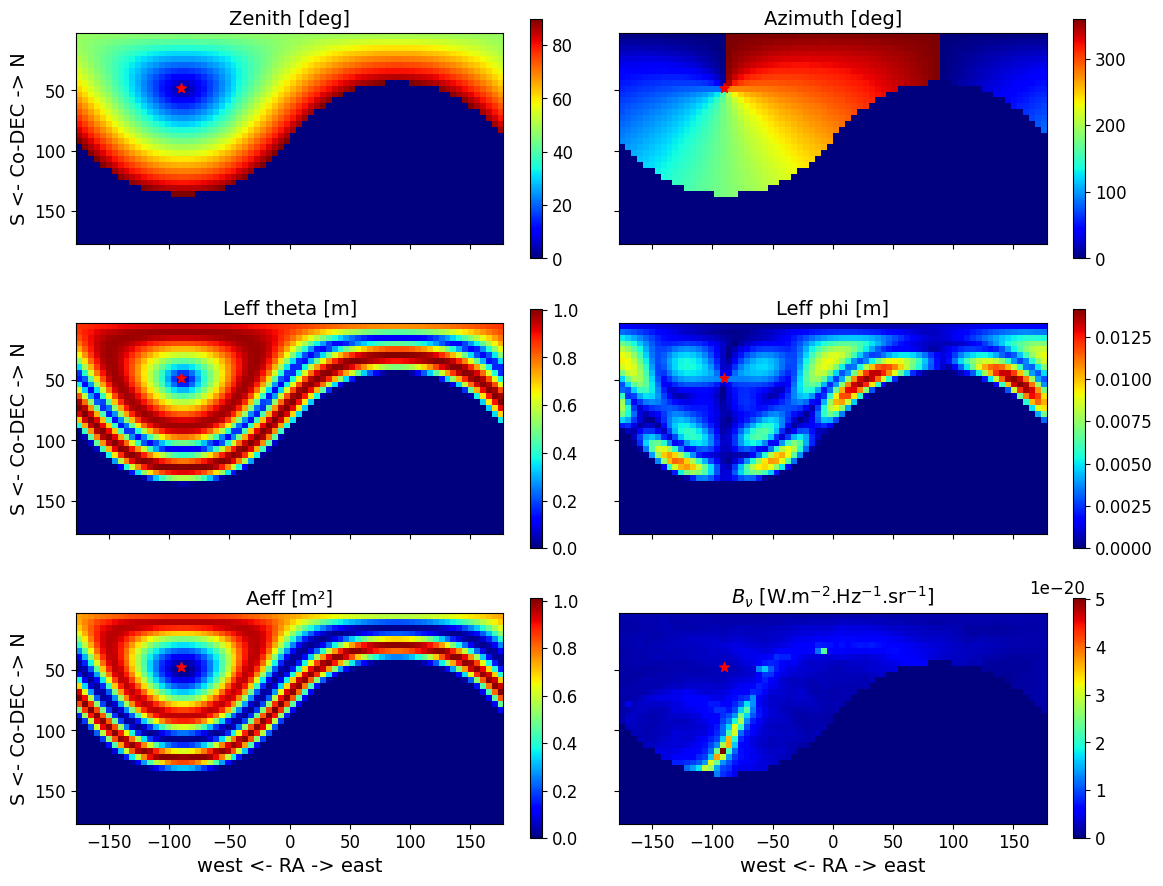

Calculating noise power for LST 6.50 hours
Calculating noise power for LST 7.00 hours
Calculating noise power for LST 7.50 hours
Calculating noise power for LST 8.00 hours
Calculating noise power for LST 8.50 hours
Calculating noise power for LST 9.00 hours
Calculating noise power for LST 9.50 hours
Calculating noise power for LST 10.00 hours
Calculating noise power for LST 10.50 hours
Calculating noise power for LST 11.00 hours
Calculating noise power for LST 11.50 hours
Calculating noise power for LST 12.00 hours
Calculating noise power for LST 12.50 hours
Calculating noise power for LST 13.00 hours
Calculating noise power for LST 13.50 hours
Calculating noise power for LST 14.00 hours
Calculating noise power for LST 14.50 hours
Calculating noise power for LST 15.00 hours
Calculating noise power for LST 15.50 hours
Calculating noise power for LST 16.00 hours
Calculating noise power for LST 16.50 hours
Calculating noise power for LST 17.00 hours
Calculating noise power for LST 17.50 h

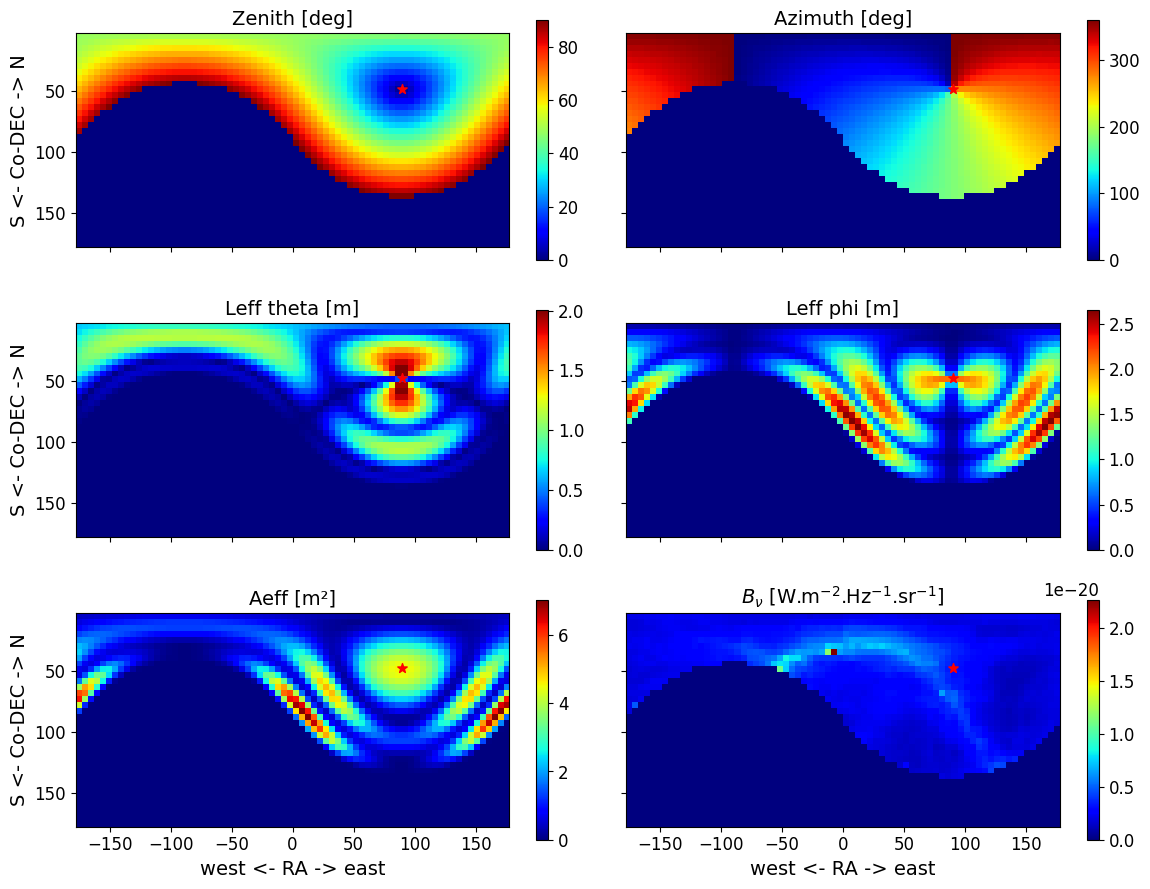

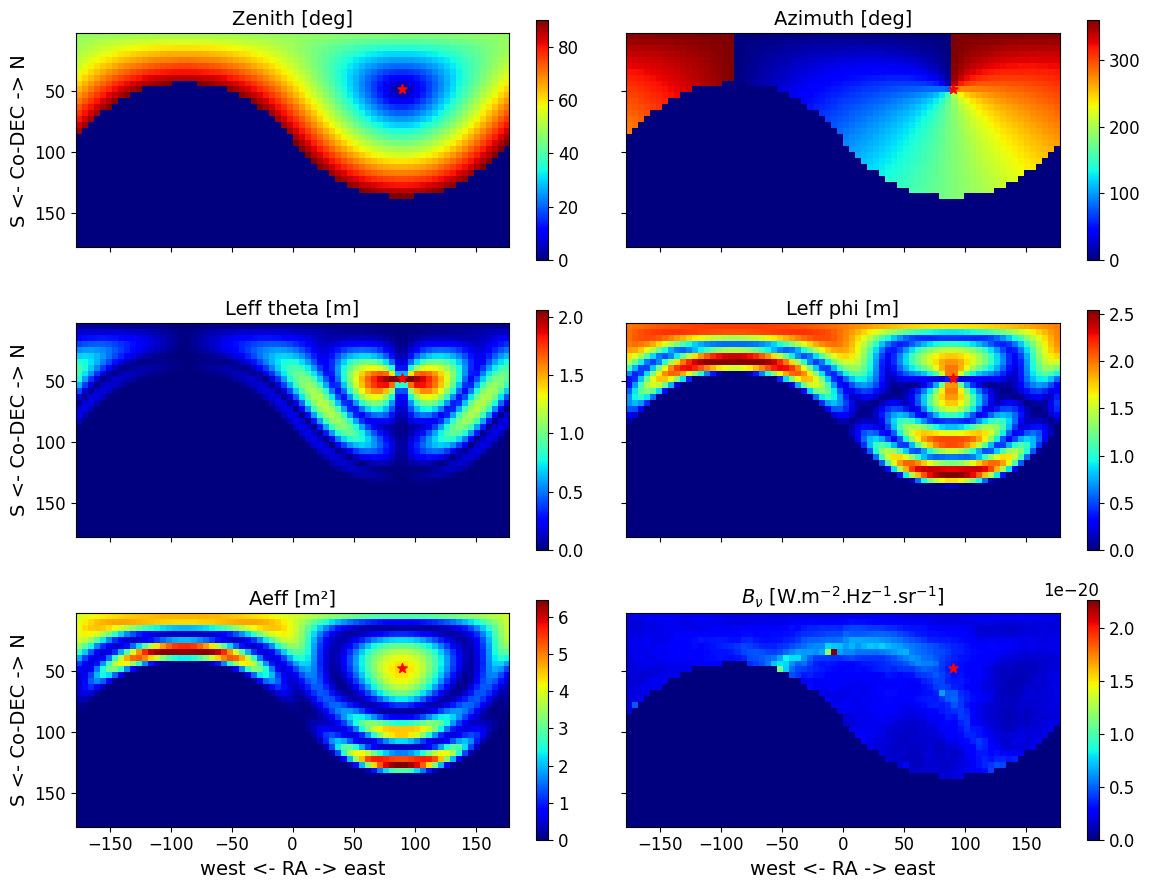

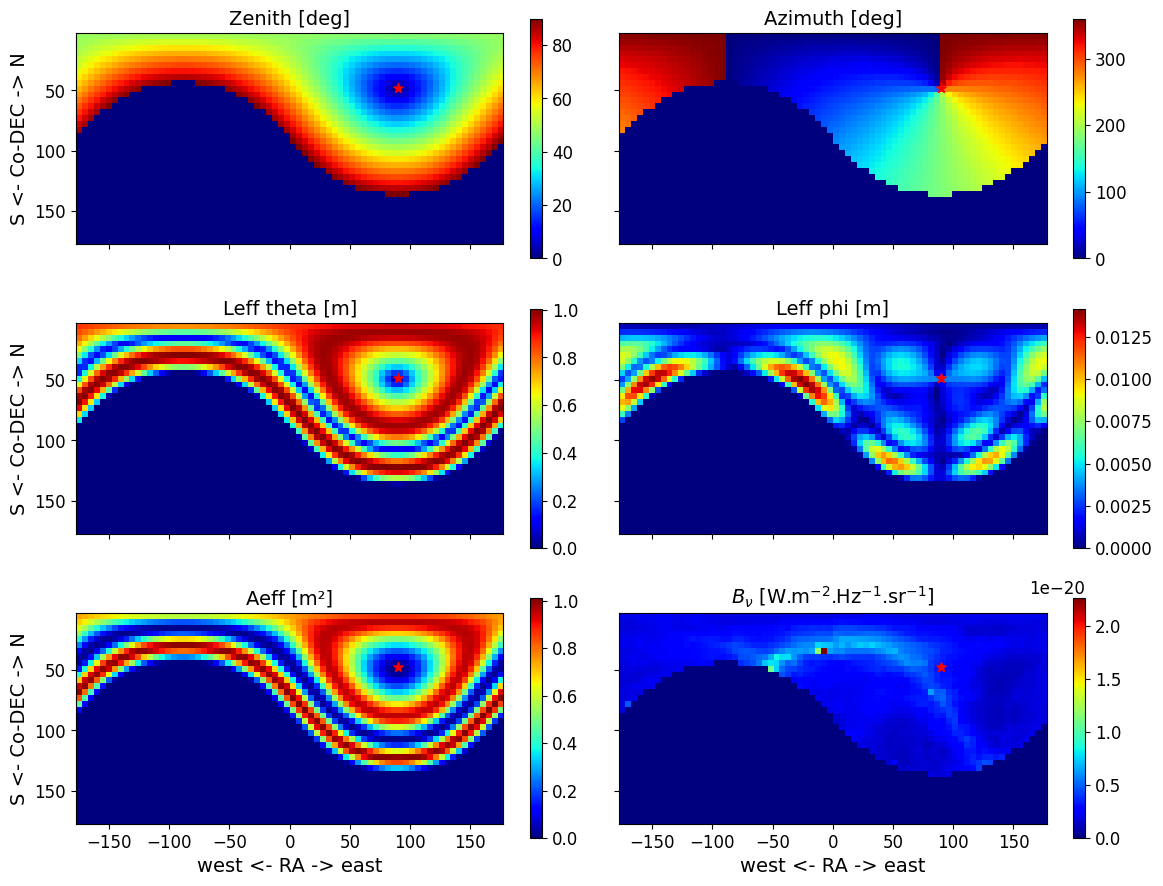

Calculating noise power for LST 18.50 hours
Calculating noise power for LST 19.00 hours
Calculating noise power for LST 19.50 hours
Calculating noise power for LST 20.00 hours
Calculating noise power for LST 20.50 hours
Calculating noise power for LST 21.00 hours
Calculating noise power for LST 21.50 hours
Calculating noise power for LST 22.00 hours
Calculating noise power for LST 22.50 hours
Calculating noise power for LST 23.00 hours
Calculating noise power for LST 23.50 hours


In [14]:
samples_fft, samples = noise_computer.noise_samples(3, 500)

ValueError: x and y must have same first dimension, but have shapes (1638,) and (8192,)

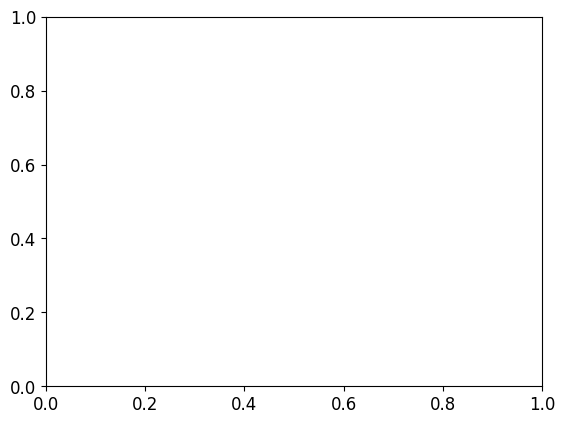

In [15]:
plt.plot(np.linspace(0, 4.096, 8192)[1:-1:5], samples[0,0,:]*1e6, label='SN')

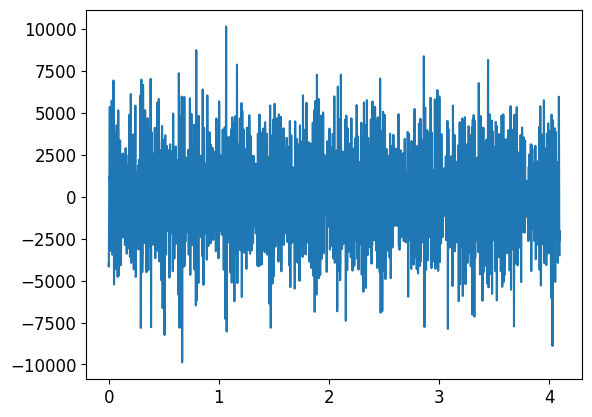

In [52]:
plt.plot(np.linspace(0, 4.096, 8192)[::], samples[0,0,:]*1e6, label='SN')

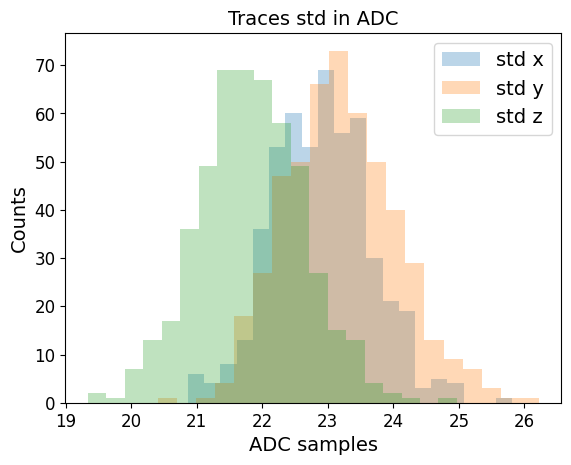

In [16]:
for i in range(3):
    plt.hist(samples[:, i,:].std(axis=-1)/(.9/8192), bins=20, label=f"std {'xyz'[i]}", alpha=.3)
plt.title('Traces std in ADC')
plt.xlabel('ADC samples')
plt.ylabel('Counts')
plt.legend()

In [30]:
.9/8192*1e6

109.86328125